# Projeto 2 - Ciência dos Dados
## Integrantes: Arthur Abdo, Cauê Pileckas, Otavio Blanco, Victor Soares

## Introdução

<br>O Exame Nacional do Ensino Médio (ENEM) é mais do que uma avaliação. Desde sua implementação em 1998, o ENEM se destacou como uma ferramenta nacional que vai além da medição de conhecimentos, tornando-se uma porta de acesso ao ensino superior e um termômetro das disparidades educacionais.<br>
<br>
A importância do ENEM transcende o ambiente escolar, influenciando políticas públicas e servindo como indicador social. Seus resultados tornaram-se critérios essenciais para o desenvolvimento de programas governamentais e são fundamentais para a compreensão dos problemas socioeconômicos e regionais que permeiam o Brasil.

Neste sentido, este projeto tem como objetivo realizar uma análise exploratória de microdados do  Exame Nacional do Ensino Médio (ENEM) por escola em todo o Brasil entre os anos de 2009 e 2015. A proposta central é saber se é possível prever um modelo que nos permita descobrir se a taxa de participação na prova em um determinado ano foi maior do que 50%. Mas também compreender quais fatores podem influenciar a probabilidade de uma escola ter uma taxa de participação inferior ou superior a esse valor. Para alcançar esse objetivo, utilizamos um conjunto de dados abrangente, composto por informações variadas sobre escolas, incluindo sua localização geográfica, tipo de dependência administrativa, quantidade de alunos, entre outros.

## Base de Dados
Na condução deste estudo, utilizamos os dados disponibilizados pelo INEP por meio do portal do Ministério da Educação (MEC). Essas informações fundamentais forneceram a base necessária para a análise e interpretação dos padrões educacionais considerados em nossa pesquisa.
O link para o download da base da dados pode ser encontrado aqui: http://portal.mec.gov.br/component/tags/tag/enem-por-escola

## Target: 
Variável dependente, cujo comportamento será projetado em resposta à influência das demais variáveis presentes na base de dados.
#### NU_TAXA_PARTICIPACAO: A taxa de participação é o número total de participantes no ENEM da escola dividido pelo número de matriculados nos anos finais do Ensino Médio da escola, informado no Censo Escolar.

## Variáveis presentes na base de dados inicial

A base de dados inicial incluía uma gama de variáveis que abrangiam diferentes aspectos das escolas. Abaixo estão todas as variáveis disponíveis. As consideradas relevantes (**features**) para o modelo proposto e portanto, incluídas no projeto foram destacadas em verde:

#### 1. NU_ANO: Ano da edição do ENEM por Escola
#### 2. CO_UF_ESCOLA: Código da Unidade da Federação da escola.
#### 3. <span style="background-color:lightgreen;">SG_UF_ESCOLA: Sigla da Unidade da Federação da escola. </span>
#### 4. CO_MUNICIPIO_ESCOLA: Código do município da escola.
#### 5. NO_MUNICIPIO_ESCOLA: Nome do município da escola.
#### 6. CO_ESCOLA_EDUCACENSO: Código da Escola. Número gerado como identificador da escola no Educacenso. 
#### 7. NO_ESCOLA_EDUCACENSO: Nome da Escola no Educacenso do ano anterior.
#### 8. <span style="background-color:lightgreen;">TP_DEPENDENCIA_ADM_ESCOLA: Tipo da dependência administrativa da entidade (Escola) do Educacenso. </span>
#### 9. <span style="background-color:lightgreen;">TP_LOCALIZACAO_ESCOLA: Tipo de Localização da escola. </span>
#### 10. NU_MATRICULAS: Número de alunos matriculados no Censo Escolar na 3ª e 4ª do Ensino Médio. 
#### 11. NU_PARTICIPANTES_NEC_ESP: Número de Participantes do Enem que cumprem os requisitos de participação no cálculo da média e possui necessidade especial.
#### 12. NU_PARTICIPANTES: Número de Participantes do Enem que cumprem os requisitos de participação no cálculo da média. 
#### 13. NU_MEDIA_CN: Média das notas de Ciências da Natureza do Ensino Médio Regular.
#### 13. NU_MEDIA_CH: Média das notas de Ciências Humanas do Ensino Médio Regular. 
#### 15. NU_MEDIA_LP: Média das notas de Linguagens e Códigos do Ensino Médio Regular. 
#### 16. NU_MEDIA_MT: Média das notas de Matemática do Ensino Médio Regular. 
#### 17. NU_MEDIA_RED: Média das notas de Redação do Ensino Médio Regular. 
#### 18. NU_MEDIA_OBJ: Média da prova objetiva do Ensino Médio Regular. 
#### 19.NU_MEDIA_TOT: Média Total (Redação e Prova Objetiva) Ensino Médio Regular corrigida pelo número de participantes.
#### 20. <span style="background-color:lightgreen;">INSE: Indicador de Nível Socioeconômico da escola - Para melhor descrever o nível socioeconômico das escolas, foram criados seis grupos, de forma que o Grupo 1 congrega as escolas com Inse médio mais baixo e o Grupo 6, com mais alto. (Edição 2015) </span>
#### 21. PC_FORMACAO_DOCENTE: Indicador de Adequação da Formação Docente da escola para lecionar no Ensino Médio.
#### 22. NU_TAXA_PERMANENCIA: Indicador de Permanência na Escola para o Ensino Médio.
#### 23. <span style="background-color:lightgreen;">NU_TAXA_APROVACAO: Taxa de aprovação dos alunos no Ensino Médio. </span>
#### 24. NU_TAXA_REPROVACAO: Taxa de reprovação dos alunos no Ensino Médio.
#### 25. NU_TAXA_ABANDONO: Taxa de abandono dos alunos no Ensino Médio.
#### 26. <span style="background-color:lightgreen;">PORTE_ESCOLA: O indicador de porte da escola defini o tamanho da escola pelo número de alunos matriculados no último ano do Ensino médio. </span>




## Importando bibliotecas

In [104]:
!pip install numpy==1.23.5

In [1]:
!pip install protobuf==3.20.* --user
!pip install tensorflow==2.8.0 --user

  Using cached protobuf-3.20.3-cp39-cp39-win_amd64.whl (904 kB)


  Using cached tensorflow-2.8.0-cp39-cp39-win_amd64.whl (438.0 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"

In [5]:
# imports
import pandas as pd
import numpy as np

# PARA DEIXAR EM GRAFICO NAO EDITAVEL
%matplotlib inline

import csv

from sklearn.preprocessing import *
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm, probplot

# Para ter melhor print
from IPython.display import display

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier

## Refinando a base de dados 
Inicialmente, nos deparamos com uma base de dados volumosa, cujas dimensões se mostravam incompatíveis com a capacidade de leitura do Jupyter. Diante desse desafio, optamos por extrair apenas as linhas e colunas que eram pertinentes ao escopo da nossa análise. Essa decisão resultou na criação de uma nova base de dados, mais enxuta e focalizada, contendo exclusivamente os anos de interesse e as variáveis previamente definidas para o nosso estudo. Essa abordagem não apenas otimizou o processo de análise, mas também assegurou a relevância e eficácia das informações contidas no conjunto de dados, que será analisado neste projeto.

## Obtendo e analisando os Microdados

In [6]:
# Usando pandas para ler a base de dados
df = pd.read_csv('data_cdados.csv', low_memory=False)
df = df.set_index('NU_ANO')
df.head()

,SG_UF_ESCOLA,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_TAXA_PARTICIPACAO,INSE,NU_TAXA_APROVACAO,PORTE_ESCOLA
NU_ANO,,,,,,,
2009,BA,2,1,17.7,NaN,66.2,Maior que 90 alunos
2009,CE,2,1,19.4,NaN,73.3,Maior que 90 alunos
2009,SP,2,1,13.4,NaN,67.5,Maior que 90 alunos
2009,SP,2,1,32.4,NaN,86.0,Maior que 90 alunos
2009,RS,4,1,67.9,NaN,83.3,De 31 a 60 alunos


## Analisando dimensão do banco de dados

In [7]:
df.shape

(104687, 7)

In [8]:
# Analisando Estados
df['SG_UF_ESCOLA'].unique()

lista_estados = []
for estado in df['SG_UF_ESCOLA']:
    if estado in lista_estados:
        continue
    else:
        lista_estados.append(estado)
        
lista_estados = pd.Series(lista_estados)
lista_estados = lista_estados.sort_values()
print(list(lista_estados))

['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']


## Tratando banco de dados para a análise exploratória

Antes de iniciarmos o trabalho com nossa base de dados, é essencial estabelecer alguns padrões para evitar possíveis interferências que poderiam prejudicar a análise. Nesse contexto, procedemos à remoção de valores nulos e à adequação das variáveis para que pudessem ser interpretadas com a sua correta natureza, seja ela categórica, do tipo float, entre outras.

In [9]:
# Removendo valores nulos das colunas, pois sem isso não é possível transformá-los em "float"
df.loc[df['NU_TAXA_APROVACAO'] == '', 'NU_TAXA_APROVACAO'] = 0
df.loc[df['NU_TAXA_PARTICIPACAO'] == '', 'NU_TAXA_PARTICIPACAO'] = 0

# Trocando as siglas de cada Estado por números enumerados de 1 a 27, para conseguirmos plotar o "pairplot"
df['SG_UF_ESCOLA'] = df['SG_UF_ESCOLA'].astype('category')

# df['SG_UF_ESCOLA'].cat.categories = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 
#                                     12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]

# Fazendo o mesmo com a coluna que diz respeito ao porte da escola
df['PORTE_ESCOLA'] = df['PORTE_ESCOLA'].astype('category')

df['PORTE_ESCOLA'].cat.categories = [1, 2, 3, 4]

# Convertendo todos os valores para "float" para diminuir o tempo de carregamento do "pariplot"
# df['SG_UF_ESCOLA'] = df['SG_UF_ESCOLA'].astype(float)
df['TP_DEPENDENCIA_ADM_ESCOLA'] = df['TP_DEPENDENCIA_ADM_ESCOLA'].astype(float)
df['TP_LOCALIZACAO_ESCOLA'] = df['TP_LOCALIZACAO_ESCOLA'].astype(float)
df['NU_TAXA_PARTICIPACAO'] = df['NU_TAXA_PARTICIPACAO'].astype(float)
df['NU_TAXA_APROVACAO'] = df['NU_TAXA_APROVACAO'].astype(float)
df['PORTE_ESCOLA'] = df['PORTE_ESCOLA'].astype(float)
df.drop(['INSE'], axis=1, inplace=True)
df.head()

,SG_UF_ESCOLA,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_TAXA_PARTICIPACAO,NU_TAXA_APROVACAO,PORTE_ESCOLA
NU_ANO,,,,,,
2009,BA,2.0,1.0,17.7,66.2,4.0
2009,CE,2.0,1.0,19.4,73.3,4.0
2009,SP,2.0,1.0,13.4,67.5,4.0
2009,SP,2.0,1.0,32.4,86.0,4.0
2009,RS,4.0,1.0,67.9,83.3,2.0


In [10]:
# Verificando parâmetros das features e do target
df.describe()

,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_TAXA_PARTICIPACAO,NU_TAXA_APROVACAO,PORTE_ESCOLA
count,104687.000000,104687.000000,104687.000000,103852.000000,104687.000000
mean,2.730511,1.036518,64.443924,84.813194,2.656872
std,0.982292,0.187577,23.221287,12.341646,1.190865
min,1.000000,1.000000,2.000000,0.000000,1.000000
25%,2.000000,1.000000,51.350000,77.100000,2.000000
50%,2.000000,1.000000,65.910000,87.700000,3.000000
75%,4.000000,1.000000,83.720000,94.900000,4.000000
max,4.000000,2.000000,100.000000,100.000000,4.000000


### Verificando valores nulos
Verificando a presença de alguns valores nulos remanescentes. Para esses casos, foram removidas as linhas que os possuiam.

In [11]:
df.isnull().sum()

SG_UF_ESCOLA                   0
TP_DEPENDENCIA_ADM_ESCOLA      0
TP_LOCALIZACAO_ESCOLA          0
NU_TAXA_PARTICIPACAO           0
NU_TAXA_APROVACAO            835
PORTE_ESCOLA                   0
dtype: int64

In [12]:
df = df.dropna()
print(df.isnull().sum())
print('---------------------')
print(df.shape)

SG_UF_ESCOLA                 0
TP_DEPENDENCIA_ADM_ESCOLA    0
TP_LOCALIZACAO_ESCOLA        0
NU_TAXA_PARTICIPACAO         0
NU_TAXA_APROVACAO            0
PORTE_ESCOLA                 0
dtype: int64
---------------------
(103852, 6)


## Trocando rótulos das variáveis categóricas 

In [13]:
df['TP_DEPENDENCIA_ADM_ESCOLA'] = df['TP_DEPENDENCIA_ADM_ESCOLA'].astype('category')
# df['INSE'] = df['INSE'].astype('category')
df['TP_LOCALIZACAO_ESCOLA'] = df['TP_LOCALIZACAO_ESCOLA'].astype('category')
df['PORTE_ESCOLA'] = df['PORTE_ESCOLA'].astype('category')

df['TP_DEPENDENCIA_ADM_ESCOLA'].cat.categories = ['federal', 'estadual', 'municipal', 'privada']
df['TP_LOCALIZACAO_ESCOLA'].cat.categories = ['urbana', 'rural']
df['PORTE_ESCOLA'].cat.categories = ['pequena', 'medio', 'grande', 'gigante']

df.loc[df['NU_TAXA_APROVACAO'] == '', 'NU_TAXA_APROVACAO'] = 0
df['NU_TAXA_APROVACAO'] = df['NU_TAXA_APROVACAO'].astype(float)


df.head()

,SG_UF_ESCOLA,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_TAXA_PARTICIPACAO,NU_TAXA_APROVACAO,PORTE_ESCOLA
NU_ANO,,,,,,
2009,BA,estadual,urbana,17.7,66.2,gigante
2009,CE,estadual,urbana,19.4,73.3,gigante
2009,SP,estadual,urbana,13.4,67.5,gigante
2009,SP,estadual,urbana,32.4,86.0,gigante
2009,RS,privada,urbana,67.9,83.3,medio


## One Hot Encoding 
Durante o treinamento de modelos de machine learning, enfrentamos um desafio significativo ao lidar com variáveis categóricas. As categorias não podem ser diretamente empregadas em formato de texto, pois os algoritmos compreendem exclusivamente valores numéricos. Atribuir quaisquer valores numéricos a cada categoria também não é uma solução viável, pois isso pode introduzir uma ordenação e pesos que podem interferir nos resultados do modelo.<br>
<br>
Para solucionar esse problema, foi usado o método conhecido como "One Hot Encoding", que essencialmente, transforma uma variável categórica com N categorias distintas em N novas variáveis binárias (dummy), sendo que cada variável representa uma nova coluna e o valor na linha correspondente será 1, caso tenha a presença da característica. Do contrário, será 0. Isso permite que algoritmos de aprendizado de máquina entendam e processem essas variáveis categóricas de maneira apropriada, já que muitos modelos requerem entradas numéricas. 
<br>
Nesta etapa utilizamos o seguinte método através da função "get_dummies" da biblioteca Pandas.

In [14]:
# One Hot Encoding
dummies_uf = pd.get_dummies(df['SG_UF_ESCOLA'], prefix='uf', drop_first=True)
dummies_tipo = pd.get_dummies(df['TP_DEPENDENCIA_ADM_ESCOLA'], prefix='tp', drop_first=True)
dummies_loc = pd.get_dummies(df['TP_LOCALIZACAO_ESCOLA'], prefix='loc', drop_first=True)
dummies_porte = pd.get_dummies(df['PORTE_ESCOLA'], prefix='tam', drop_first=True)

data = pd.concat([dummies_uf, dummies_tipo, dummies_loc, dummies_porte], axis=1, ignore_index=False)

## MinMax Scaler 
Antes de trabalharmos efetivamente na base de dados, precisamos realizar o escalonamento dos mesmos. Para isso utilizamos o "MinMaxScaler" do módulo "sklearn.preprocessing".
Ao aplicar o MinMax Scaler a todas as colunas do DataFrame, garantimos que os dados estejam normalizados no intervalo (0,1). Evitando que variáveis em escalas diferentes tenham um impacto desproporcional em algoritmos de machine learning.

In [15]:
data_scaling = data.copy()

# Inserindo taxa de aprovação
data_scaling['aprovacao'] = df['NU_TAXA_APROVACAO']

# Min-Max scaler
mms = MinMaxScaler()
data_scaling[data_scaling.columns[:]] = mms.fit_transform(data_scaling)
data_scaling.head()

,uf_AL,uf_AM,uf_AP,uf_BA,uf_CE,uf_DF,uf_ES,uf_GO,uf_MA,uf_MG,...,uf_SP,uf_TO,tp_estadual,tp_municipal,tp_privada,loc_rural,tam_medio,tam_grande,tam_gigante,aprovacao
NU_ANO,,,,,,,,,,,,,,,,,,,,,
2009,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.662
2009,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.733
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.675
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.860
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.833


In [16]:
# Adicionando colunas
data_scaling['TARGET'] = df['NU_TAXA_PARTICIPACAO']

In [17]:
X_train = data_scaling.drop('TARGET', axis=1, inplace=False)
Y_train = data_scaling['TARGET'].to_frame()
print(f'Proporções das features: {X_train.shape}')
print(f'Proporção do target: {Y_train.shape}')

Proporções das features: (103852, 34)
Proporção do target: (103852, 1)


## Criando uma função de regressão 
Para entender a relação entre o Target e nossas features precisamos realizar uma regressão. Para isso utilizamos a  biblioteca Statsmodels.

In [18]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

### Aplicando a função de regressão "regress"

In [19]:
# Definindo features e target para a função "regress
X_train = data_scaling.drop('TARGET', axis=1, inplace=False)
Y_train = data_scaling['TARGET'].to_frame()

print(f'Proporções das features: {X_train.shape}')
print(f'Proporção do target: {Y_train.shape}')

Proporções das features: (103852, 34)
Proporção do target: (103852, 1)


In [20]:
print(data_scaling.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103852 entries, 2009 to 2015
Data columns (total 35 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   uf_AL         103852 non-null  float64
 1   uf_AM         103852 non-null  float64
 2   uf_AP         103852 non-null  float64
 3   uf_BA         103852 non-null  float64
 4   uf_CE         103852 non-null  float64
 5   uf_DF         103852 non-null  float64
 6   uf_ES         103852 non-null  float64
 7   uf_GO         103852 non-null  float64
 8   uf_MA         103852 non-null  float64
 9   uf_MG         103852 non-null  float64
 10  uf_MS         103852 non-null  float64
 11  uf_MT         103852 non-null  float64
 12  uf_PA         103852 non-null  float64
 13  uf_PB         103852 non-null  float64
 14  uf_PE         103852 non-null  float64
 15  uf_PI         103852 non-null  float64
 16  uf_PR         103852 non-null  float64
 17  uf_RJ         103852 non-null  float64
 18  uf_

In [21]:
#Analisando os resultados obtidos 
results = regress(Y_train, X_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     2286.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:11:01   Log-Likelihood:            -4.4499e+05
No. Observations:              103852   AIC:                         8.901e+05
Df Residuals:                  103817   BIC:                         8.904e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           34.9053      1.129     30.910      0.000      32.692      37.119
uf_AL           -5.4525      1.026     -5.313      0.000      -7.464      -3.441
uf_AM            0.2101      1.015      0.207      0.836      -1.779       2.199
uf_AP            1.2899      1.308      0.986      0.324      -1.273       3.853
uf_BA           -5.0479      0.927     -5.445      0.000      -6.865      -3.231
uf_CE            6.3437      0.925      6.860      0.000       4.531       8.156
uf_DF            1.3248      1.038      1.277      0.202      -0.709       3.358
uf_ES           17.3692      0.953     18.229      0.000      15.502      19.237
uf_GO           -4.7123      0.935     -5.041      0.000      -6.544      -2.880
uf_MA           -4.2354      0.958     -4.423      0.000      -6.112      -2.359
uf_MG            0.0539      0.904      0.060      0.952      -1.717       1.825
uf_MS            7.7176      0.974      7.920      0.000       5.808       9.628
uf_MT            4.1308      0.976      4.232      0.000       2.218       6.044
uf_PA           -3.6617      0.963     -3.803      0.000      -5.549      -1.774
uf_PB            1.5113      0.966      1.565      0.118      -0.382       3.405
uf_PE           -3.9977      0.929     -4.303      0.000      -5.818      -2.177
uf_PI            1.4843      0.964      1.539      0.124      -0.406       3.375
uf_PR           -5.1280      0.916     -5.598      0.000      -6.923      -3.333
uf_RJ           -0.0125      0.912     -0.014      0.989      -1.800       1.775
uf_RN           -0.0023      0.983     -0.002      0.998      -1.928       1.924
uf_RO            4.1698      1.040      4.009      0.000       2.131       6.209
uf_RR           -1.6674      1.451     -1.149      0.250      -4.511       1.176
uf_RS            6.4389      0.913      7.052      0.000       4.649       8.229
uf_SC           -3.2266      0.932     -3.462      0.001      -5.053      -1.400
uf_SE            2.9746      1.027      2.895      0.004       0.961       4.988
uf_SP           -8.7574      0.898     -9.756      0.000     -10.517      -6.998
uf_TO           -0.0228      1.035     -0.022      0.982      -2.052       2.007
tp_estadual    -21.6761      0.451    -48.010      0.000     -22.561     -20.791
tp_municipal   -18.3337      0.718    -25.522      0.000     -19.742     -16.926
tp_privada      -4.0570      0.464     -8.739      0.000      -4.967      -3.147
loc_rural       -1.7813      0.301     -5.909      0.000      -2.372      -1.190
tam_medio       -3.3321      0.162    -20.515      0.000      -3.650      -3.014
tam_grande      -4.4406      0.191    -23.309      0.000      -4.814      -4.067
tam_gigante     -5.2515      0.173    -30.413      0.000      -5.590      -4.913
aprovacao       58.3377      0.578    100.860      0.000      57.204      59.471
=====

In [22]:
# Removendo features que não nos agregam: (P>|t|) > 0.1
data_scaling.drop(['uf_AM', 'uf_AP', 'uf_DF', 'uf_MG', 'uf_PB', 'uf_PI', 'uf_RJ', 'uf_RN', 'uf_RR', 'uf_TO'], axis=1, inplace=True)
data_scaling.head()

,uf_AL,uf_BA,uf_CE,uf_ES,uf_GO,uf_MA,uf_MS,uf_MT,uf_PA,uf_PE,...,uf_SP,tp_estadual,tp_municipal,tp_privada,loc_rural,tam_medio,tam_grande,tam_gigante,aprovacao,TARGET
NU_ANO,,,,,,,,,,,,,,,,,,,,,
2009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.662,17.7
2009,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.733,19.4
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.675,13.4
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.860,32.4
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.833,67.9


## Análise da feature "SG_UF_ESCOLA"

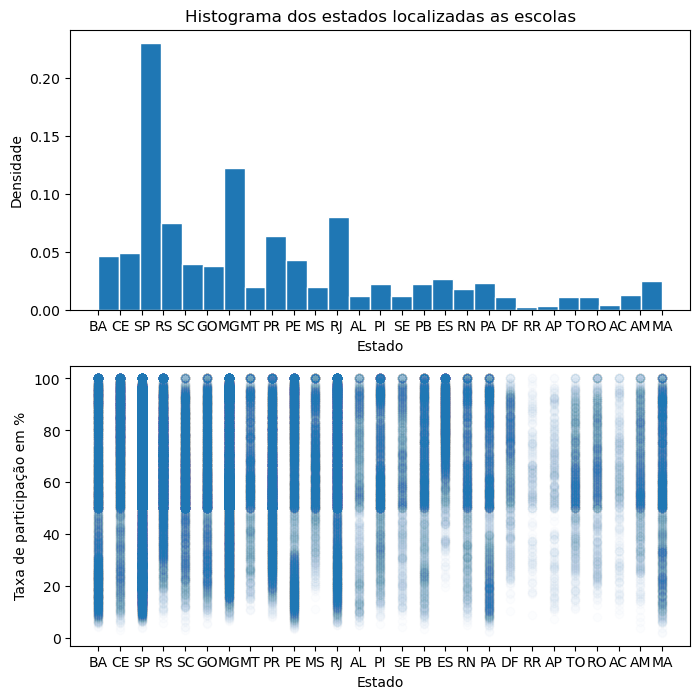

In [23]:
plt.figure(figsize=(8, 8))

plt.subplot(211)
plt.hist(df['SG_UF_ESCOLA'], bins=len(df['SG_UF_ESCOLA'].unique()), density=True, linewidth=1, edgecolor='white')
plt.title('Histograma dos estados localizadas as escolas')
plt.xlabel('Estado')
plt.ylabel('Densidade')

plt.subplot(212)
plt.scatter(df['SG_UF_ESCOLA'], df['NU_TAXA_PARTICIPACAO'], alpha=0.01)
plt.xlabel('Estado')
plt.ylabel('Taxa de participação em %')

plt.show()

Em resumo, o código cria uma figura com dois subplots: um histograma dos estados onde as escolas estão localizadas e um gráfico de dispersão entre o estado e a taxa de participação das escolas

**Análise Exploratória de Dados sobre Escolas:** Distribuição Geográfica e Taxa de Participação

O conjunto de dados em questão fornece insights valiosos sobre a distribuição geográfica de escolas e sua relação com a taxa de participação. Utilizando visualizações criadas com a biblioteca Matplotlib, exploramos aspectos cruciais do conjunto de dados.

**Histograma dos Estados onde as Escolas estão Localizadas:**
O histograma revela a distribuição da localização das escolas em diferentes estados. Cada barra representa um estado, e a altura da barra indica a densidade de escolas na região. Essa visualização oferece uma visão panorâmica da diversidade geográfica, destacando se as escolas estão uniformemente distribuídas ou concentradas em áreas específicas.

**Gráfico de Dispersão entre Estado e Taxa de Participação:**
O gráfico de dispersão explora a relação entre o estado e a taxa de participação das escolas. Cada ponto representa uma escola, com o eixo x indicando o estado e o eixo y representando a taxa de participação em percentagem. A transparência dos pontos (configurada como alpha=0.01) ajuda a visualizar padrões em meio a uma grande quantidade de dados. Este gráfico oferece insights sobre como a taxa de participação varia entre diferentes estados, indicando possíveis influências geográficas ou socioeconômicas.

**Conclusões Preliminares:**
É preceptível que a UF SP (São Paulo) é a mais influente no quesito de taxa de particpação abaixo de 50%, ou seja, ela é a mais propricia de ter uma participação abaixo de 50%.

## Análise da feature "TP_DEPENDENCIA_ADM_ESCOLA"

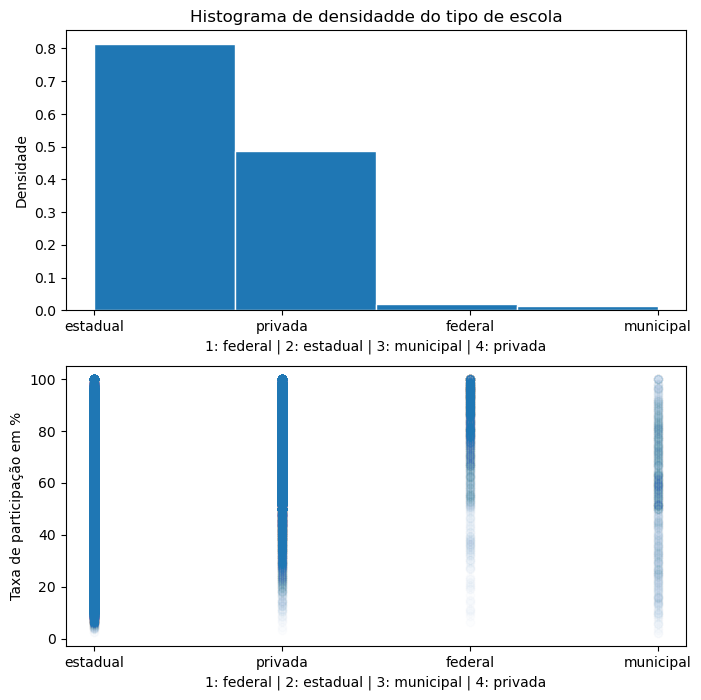

In [24]:
plt.figure(figsize=(8, 8))

plt.subplot(211)
plt.hist(df['TP_DEPENDENCIA_ADM_ESCOLA'], bins=len(df['TP_DEPENDENCIA_ADM_ESCOLA'].unique()), density=True, linewidth=1, edgecolor='white')
plt.title('Histograma de densidadde do tipo de escola')
plt.xlabel('1: federal | 2: estadual | 3: municipal | 4: privada')
plt.ylabel('Densidade')

plt.subplot(212)
plt.scatter(df['TP_DEPENDENCIA_ADM_ESCOLA'], df['NU_TAXA_PARTICIPACAO'], alpha=0.01)
plt.xlabel('1: federal | 2: estadual | 3: municipal | 4: privada')
plt.ylabel('Taxa de participação em %')

plt.show()

Em resumo, o código oferece uma representação visual da distribuição dos tipos de escolas com base em sua dependência administrativa e explora como essa dependência está relacionada à taxa de participação. Essa análise visual pode revelar padrões, tendências ou discrepâncias nos dados educacionais.


**Análise Exploratória de Dados sobre Escolas:** Tipo e Participação

O código fornecido oferece visualizações cruciais para compreender a dependência administrativa das escolas e sua relação com a taxa de participação. Vamos explorar cada parte do código:

**Histograma de Densidade do Tipo de Escola:**
O primeiro subplot exibe um histograma que representa a densidade da dependência administrativa das escolas. Cada barra é associada a um tipo específico de escola (federal, estadual, municipal, privada), e a altura da barra indica a densidade de escolas para cada categoria. Essa visualização proporciona insights sobre a distribuição geral dos diferentes tipos de escolas no conjunto de dados.

**Gráfico de Dispersão entre Tipo de Escola e Taxa de Participação:**
O segundo subplot apresenta um gráfico de dispersão, onde o eixo x representa o tipo de escola e o eixo y representa a taxa de participação em percentagem. A transparência dos pontos (configurada como alpha=0.01) ajuda a visualizar padrões em meio a uma grande quantidade de dados. Este gráfico permite investigar se há variação significativa na taxa de participação entre os diferentes tipos de escolas.

**Conclusões Preliminares:**
É preceptível que a escola estudal é a mais influente no quesito de taxa de particpação abaixo de 50%, ou seja, ela é a mais propricia de ter uma participação abaixo de 50%.

## Análise da feature "TP_LOCALIZACAO_ESCOLA"

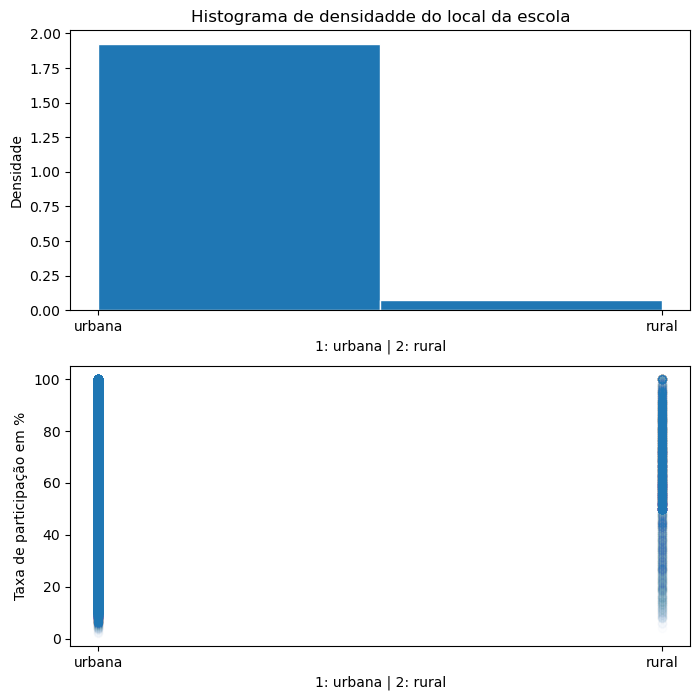

In [25]:
plt.figure(figsize=(8, 8))

plt.subplot(211)
plt.hist(df['TP_LOCALIZACAO_ESCOLA'], bins=len(df['TP_LOCALIZACAO_ESCOLA'].unique()), density=True, linewidth=1, edgecolor='white')
plt.title('Histograma de densidadde do local da escola')
plt.xlabel('1: urbana | 2: rural')
plt.ylabel('Densidade')

plt.subplot(212)
plt.scatter(df['TP_LOCALIZACAO_ESCOLA'], df['NU_TAXA_PARTICIPACAO'], alpha=0.01)
plt.xlabel('1: urbana | 2: rural')
plt.ylabel('Taxa de participação em %')

plt.show()

Em resumo, o código oferece uma representação visual da distribuição das escolas com base em sua localização (urbana ou rural) e explora como essa localização está relacionada à taxa de participação. Essas visualizações podem fornecer insights sobre possíveis diferenças nas características educacionais entre escolas urbanas e rurais.


**Análise Exploratória de Dados sobre Escolas:** Distribuição Geográfica e Taxa de Participação

A análise a seguir explora a relação entre a localização das escolas, classificadas como urbanas ou rurais, e sua taxa de participação. As visualizações, geradas utilizando a biblioteca Matplotlib, proporcionam insights valiosos sobre a interseção desses fatores.

**Histograma da Distribuição entre Escolas Urbanas e Rurais:**
O primeiro subplot exibe um histograma que revela a densidade da localização das escolas, categorizadas como urbanas ou rurais. Cada barra representa uma dessas categorias, sendo "1: urbana" e "2: rural". A altura das barras indica a densidade de escolas em cada categoria, oferecendo uma visão panorâmica da diversidade geográfica. Essa visualização se alinha com a categorização proposta no código original.

**Gráfico de Dispersão entre Localização da Escola e Taxa de Participação:**
O segundo subplot apresenta um gráfico de dispersão que explora a relação entre a localização da escola e sua taxa de participação. Cada ponto no gráfico representa uma escola, com o eixo x indicando se é uma escola urbana ou rural, e o eixo y representando a taxa de participação em percentagem. A transparência dos pontos (configurada como alpha=0.01) auxilia na visualização de padrões. Este gráfico oferece insights sobre como a taxa de participação varia entre escolas urbanas e rurais, complementando a análise do primeiro subplot.

**Conclusões Preliminares:**
É preceptível que a escola localizada na região urbana é a mais influente no quesito de taxa de particpação abaixo de 50%, ou seja, esta localidade é a mais propricia de ter uma participação abaixo de 50%.

## Análise da feature "NU_TAXA_APROVACAO"

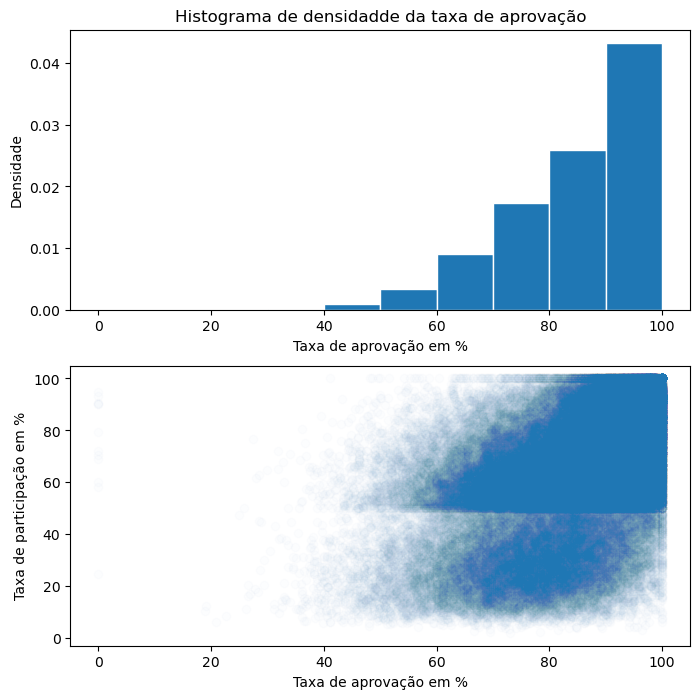

In [26]:
plt.figure(figsize=(8, 8))

plt.subplot(211)
plt.hist(df['NU_TAXA_APROVACAO'], bins=10, density=True, linewidth=1, edgecolor='white')
plt.title('Histograma de densidadde da taxa de aprovação')
plt.xlabel('Taxa de aprovação em %')
plt.ylabel('Densidade')

plt.subplot(212)
plt.scatter(df['NU_TAXA_APROVACAO'], df['NU_TAXA_PARTICIPACAO'], alpha=0.01)
plt.xlabel('Taxa de aprovação em %')
plt.ylabel('Taxa de participação em %')

plt.show()

Em resumo, o código proporciona uma representação visual da distribuição das escolas com base em suas taxas de aprovação e explora a relação entre essas taxas e a taxa de participação. As visualizações geradas, incluindo o histograma de densidade e o gráfico de dispersão, oferecem insights visuais sobre possíveis padrões e correlações entre a taxa de aprovação e a taxa de participação nas escolas. Essa abordagem visual é valiosa para uma análise exploratória inicial, possibilitando uma compreensão intuitiva das relações presentes nos dados relacionados à aprovação e participação escolar.

**Análise Exploratória de Dados sobre Escolas:** Taxa de Aprovação e Participação

A análise a seguir aborda a relação entre a taxa de aprovação das escolas e sua taxa de participação. Utilizando visualizações com a biblioteca Matplotlib, examinamos aspectos cruciais dessas variáveis.

**Histograma da Taxa de Aprovação:**
O primeiro subplot exibe um histograma que representa a densidade da taxa de aprovação nas escolas. Cada barra reflete um intervalo de taxas de aprovação, proporcionando uma visão abrangente da distribuição. A categoria é subdividida em 10 bins para melhor visualização, onde a altura das barras indica a densidade de escolas em cada intervalo. O eixo x representa a taxa de aprovação em percentagem, enquanto o eixo y reflete a densidade. Esta visualização complementa a análise ao se alinhar com o código fornecido.

**Gráfico de Dispersão entre Taxa de Aprovação e Taxa de Participação:**
O segundo subplot apresenta um gráfico de dispersão que explora a relação entre a taxa de aprovação e a taxa de participação das escolas. Cada ponto no gráfico representa uma escola, onde o eixo x indica a taxa de aprovação em percentagem e o eixo y representa a taxa de participação em percentagem. A transparência dos pontos (configurada como alpha=0.01) ajuda a visualizar padrões em meio a uma grande quantidade de dados. Este gráfico oferece insights sobre como a taxa de aprovação influencia a taxa de participação.

**Conclusões Preliminares:**
É preceptível que a taxa de aprovação não tem uma relação tão forte com a taxa de participação, vemos que a baixa taxa de participação influência de maneira negativa na taxa de aprovação.

## Análise da feature "PORTE_ESCOLA"

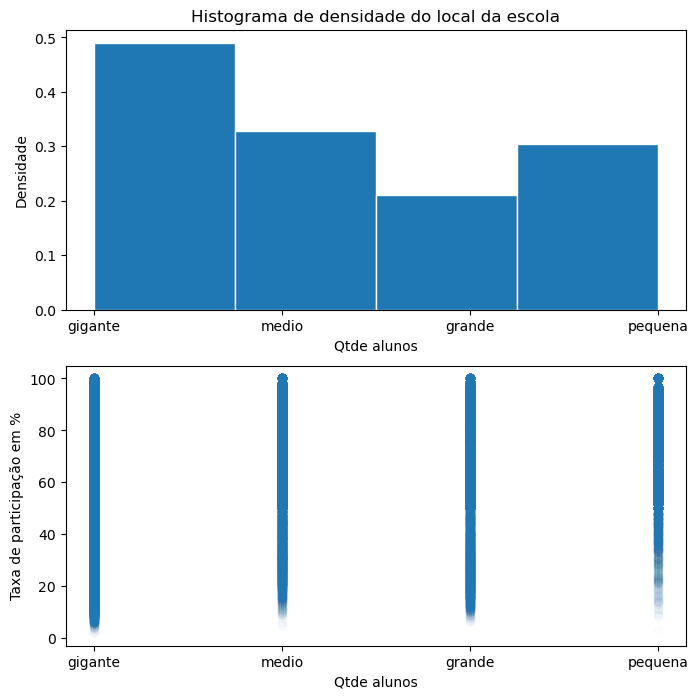

In [27]:
plt.figure(figsize=(8, 8))

plt.subplot(211)
plt.hist(df['PORTE_ESCOLA'], bins=len(df['PORTE_ESCOLA'].unique()), density=True, linewidth=1, edgecolor='white')
plt.title('Histograma de densidade do local da escola')
plt.xlabel('Qtde alunos')
plt.ylabel('Densidade')

plt.subplot(212)
plt.scatter(df['PORTE_ESCOLA'], df['NU_TAXA_PARTICIPACAO'], alpha=0.01)
plt.xlabel('Qtde alunos')
plt.ylabel('Taxa de participação em %')

plt.show()

Em resumo, o código proporciona uma representação visual da distribuição das escolas com base em seu porte (quantidade de alunos) e explora como essa variável está relacionada à taxa de participação. As visualizações geradas, incluindo o histograma de densidade e o gráfico de dispersão, oferecem insights visuais sobre possíveis associações entre o porte da escola e a taxa de participação. Essa abordagem visual é valiosa para uma análise exploratória inicial, permitindo uma compreensão intuitiva das relações presentes nos dados referentes ao porte escolar e à participação dos alunos.


**Análise Exploratória de Dados sobre Escolas:** Porte e Taxa de Participação

A análise a seguir investiga a relação entre o porte das escolas, representado pela quantidade de alunos, e sua taxa de participação. As visualizações, criadas com a biblioteca Matplotlib, oferecem insights valiosos sobre a interação entre esses fatores.

**Histograma da Distribuição entre Porte das Escolas:**
O primeiro subplot exibe um histograma que revela a densidade do porte das escolas, categorizadas com base na quantidade de alunos. Cada barra representa um intervalo específico de porte, indicando a quantidade de escolas em cada categoria. A quantidade de alunos é representada no eixo x, enquanto a densidade é refletida no eixo y. Essa visualização proporciona uma visão abrangente da diversidade no tamanho das escolas, contribuindo para uma compreensão inicial da distribuição.

**Gráfico de Dispersão entre Porte da Escola e Taxa de Participação:**
O segundo subplot apresenta um gráfico de dispersão que explora a relação entre o porte da escola e sua taxa de participação. Cada ponto no gráfico representa uma escola, onde o eixo x indica a quantidade de alunos (porte) e o eixo y representa a taxa de participação em percentagem. A transparência dos pontos, configurada como alpha=0.01, facilita a identificação de padrões em meio a uma grande quantidade de dados. Este gráfico oferece insights sobre como o porte da escola pode influenciar a taxa de participação dos alunos.

**Conclusões Preliminares:**

É preceptível que a escola que possui mais de 90 alunos é a mais influente no quesito de taxa de particpação abaixo de 50%, ou seja, ela é a mais propricia de ter uma participação abaixo de 50%.
<br>
<br>
<br>
<br>

In [28]:
dados = data_scaling.copy()
dados.head()

,uf_AL,uf_BA,uf_CE,uf_ES,uf_GO,uf_MA,uf_MS,uf_MT,uf_PA,uf_PE,...,uf_SP,tp_estadual,tp_municipal,tp_privada,loc_rural,tam_medio,tam_grande,tam_gigante,aprovacao,TARGET
NU_ANO,,,,,,,,,,,,,,,,,,,,,
2009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.662,17.7
2009,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.733,19.4
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.675,13.4
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.860,32.4
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.833,67.9


## Preparação de Dados para Modelagem: Binarização da Taxa de Participação
Na célula abaixo adequamos o nosso target para que pudesse ser interpretado pelo modelo. Se o valor da taxa de participação for maior ou igual a 50, o novo valor será 1; caso contrário, será 0. Dessa forma o modelo de machine learning implementado consegue direcionar para a nossa pergunta inicial.

In [29]:
# Formatando dados para os modelos
dados = data_scaling.copy()

# Criar uma coluna binária indicando se a taxa de participação é maior ou igual a 50%
dados['target_binario'] = (dados['TARGET'] >= 50).astype(int)

# Separar features e target
X = dados.iloc[:, 0:dados.columns.get_loc('aprovacao')]
y = dados['target_binario']

## Criação de funções para visualização e avaliação de Modelos: Matrizes de Confusão, Curvas Precision-Recall, Curvas ROC e Curvas de Aprendizado

In [30]:
# Criando funções para a plotagem dos resultados obtidos em cada modelo:
def plot_matrix_confusion(modelo, predictions, color, y_teste):
    plt.figure(figsize=(10, 5))
    plt.title(f'Matriz de confusão - Modelo: {modelo}')
    sns.heatmap(confusion_matrix(y_teste.astype(float), predictions),
        cmap=color,
        xticklabels=["Real 1", "Real 0"],
        yticklabels=["Previsto 1", "Previsto 0 "],
        annot=True,
        fmt='g')
    plt.show()  # Adicionado plt.show() para exibir o gráfico
    
def plot_avaliations(modelo, probabilidades, y_teste, modelo_):
#     CPR
    precision, recall, _ = precision_recall_curve(y_teste, probabilidades)
    average_precision = average_precision_score(y_teste, probabilidades)
    
#     ROC
    fpr, tpr, thresholds = roc_curve(y_teste, probabilidades)
    roc_auc = auc(fpr, tpr)
    
#     Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(modelo_, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
    
    plt.figure(figsize=(16, 12))
    
#     Histograma de probabilidades
    plt.subplot(221)
    plt.hist([probabilidades[y_teste == 0], probabilidades[y_teste == 1]], bins=50, color=['blue', 'orange'], label=['Classe 0', 'Classe 1'])
    plt.xlabel(f'Probabilidade Prevista - Modelo: {modelo}')
    plt.ylabel('Frequência')
    plt.title('Histograma de Probabilidades Previstas')
    plt.legend(loc='upper right')
    
#     Curva Precision Recall
    plt.subplot(222)
    plt.step(recall, precision, color='b', where='post', label='Curva Precision-Recall (área = {:.2f})'.format(average_precision))
    plt.xlabel('Revocação')
    plt.ylabel('Precisão')
    plt.title(f'Curva Precision-Recall - Modelo: {modelo}')
    plt.legend(loc='upper right')
    
#     Curva ROC
    plt.subplot(223)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    
    
#     Learning Curve
    plt.subplot(224)
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Treinamento')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Teste')
    plt.xlabel('Tamanho do Conjunto de Treinamento')
    plt.ylabel('Acurácia')
    plt.title(f'Curva de Aprendizado - Modelo: {modelo}')
    plt.legend()
    
    plt.show()

# Construção do  Primeiro Modelo - Regressão Logística
Neste primeiro modelo, foi feita uma regressão Logística, método utilizado para prever categorias binárias.O objetivo desta regressão é prever e estimar as probabilidades associadas a cada categoria (1 e 0).

In [31]:
modelo = 'Regressão Logística'
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um modelo de regressão logística
modelo_reg_logistica = LogisticRegression()

# Treinar o modelo nos dados de treinamento
modelo_reg_logistica.fit(X_train, y_train)

# Fazer previsões nos dados de teste
previsoes = modelo_reg_logistica.predict(X_test)

# Calcular a probabilidade das previsões
probabilidades = modelo_reg_logistica.predict_proba(X_test)[:, 1]

# Desempenho do modelo - Regressão Logística

Abaixo efetuou-se uma avaliação sobre o desempenho  do modelo, analisando sua acurácia , sua matriz confusão e o relatório de classificação.

In [32]:
acuracia = accuracy_score(y_test, previsoes)
matriz_confusao = confusion_matrix(y_test, previsoes)
relatorio_classificacao = classification_report(y_test, previsoes)

In [33]:
print(f'Acurácia: {acuracia:.4f}')

Acurácia: 0.7840


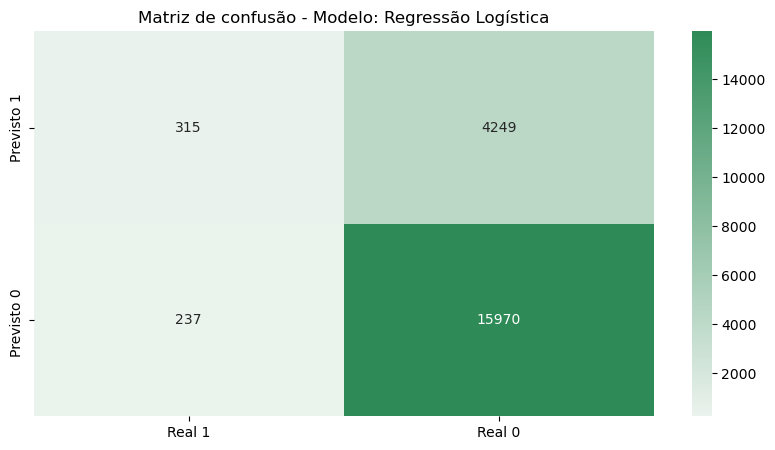

In [34]:
plot_matrix_confusion(modelo, previsoes, sns.light_palette("seagreen", as_cmap=True), y_test)

A partir da matriz gerada, conclui-se que o modelo cumpre com sua função de uma maneira efetiva, mesmo ainda contendo alguma taxa de previsões erradas. A partir do relatorio contido abaixo, nota-se que há maior precisão quando se trata de previsão sobre  participação de mais de 50%.

In [35]:
print('Relatório de Classificação:')
print(relatorio_classificacao)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.57      0.07      0.12      4564
           1       0.79      0.99      0.88     16207

    accuracy                           0.78     20771
   macro avg       0.68      0.53      0.50     20771
weighted avg       0.74      0.78      0.71     20771



**Precisão (Precision):** A proporção de verdadeiros positivos em relação à soma de verdadeiros positivos e falsos positivos. É uma métrica de qualidade das previsões positivas do modelo.

**Revocação (Recall ou Sensibilidade):** A proporção de verdadeiros positivos em relação à soma de verdadeiros positivos e falsos negativos. É uma métrica que mede a capacidade do modelo em capturar todos os casos positivos.

**F1-Score:** A média harmônica entre precisão e revocação. É uma métrica útil quando há um desequilíbrio entre as classes.

**Suporte:** O número total de ocorrências de cada classe no conjunto de teste.

**Acurácia (Accuracy):** A proporção de todas as previsões corretas em relação ao número total de previsões.

# Gráficos para Avaliação do Desempenho do modelo


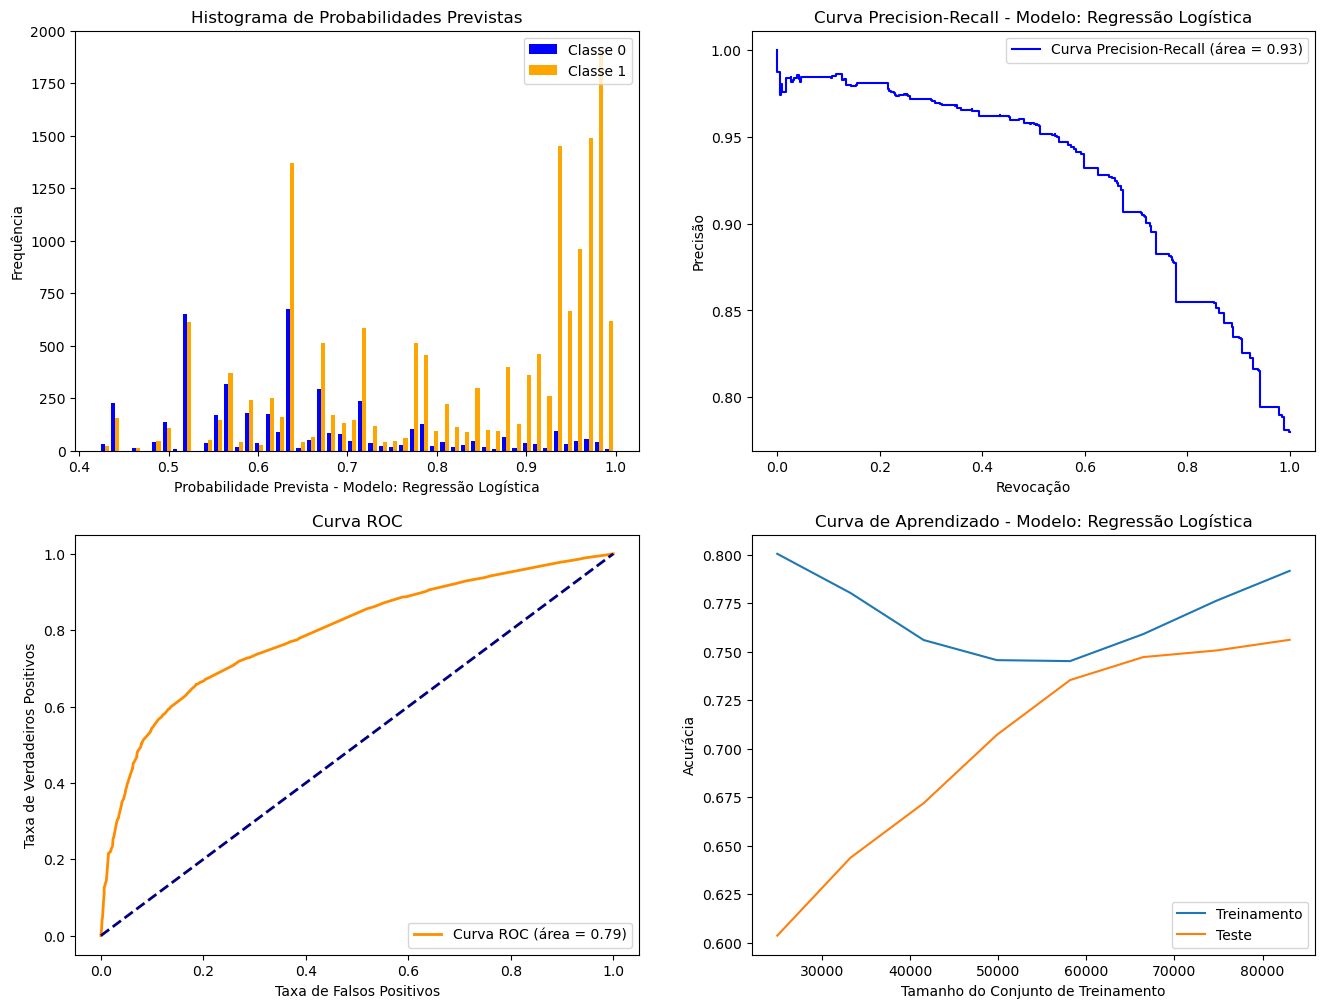

In [36]:
plot_avaliations(modelo, probabilidades, y_test, modelo_reg_logistica)

A partir do histograma de probabilidades previstas, entende-se a amplitude entre as decisões tomadas pelo modelo. Também nota-se 
que conforme o tamanho do conjunto de treinamento cresce, a acurácia aumenta.

# Construção do Segundo Modelo - Decision Tree Classifier
Nesta segunda iteração utilizou-se o modelo Decision Tree Classifier, modelo associado ao algoritmo árvore de decisão , que toma decisões baseado nas caracteristicas dos dados de entrada.

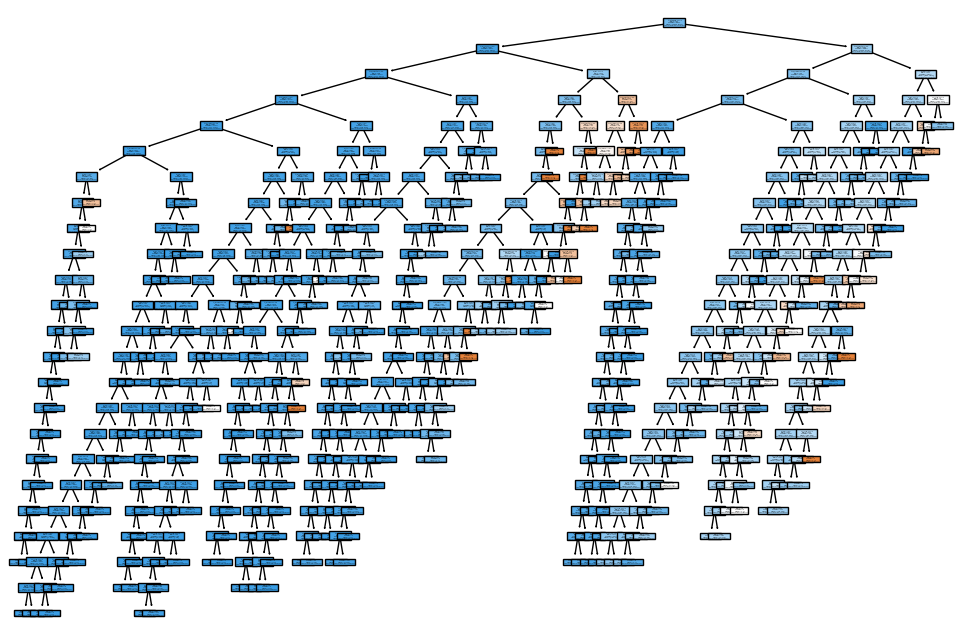

In [37]:
modelo_tree = 'Decision Tree'
# Criando um modelo de árvore de decisão
modelo_arvore = DecisionTreeClassifier(random_state=42)

# Treinar o modelo nos dados de treinamento
modelo_arvore.fit(X_train, y_train)

# Fazer previsões nos dados de teste
previsoes_arvore = modelo_arvore.predict(X_test)

probabilidades_arvore = modelo_arvore.predict_proba(X_test)[:, 1]

# Visualizar a árvore
plt.figure(figsize=(12, 8))
tree.plot_tree(modelo_arvore, feature_names=X.columns, class_names=['Menor que 50%', 'Maior ou igual a 50%'], filled=True)
plt.show()

# Desempenho do modelo - Decision Tree Classifier
Em seguida, assim como na Regressão Logistica , foi feita a avaliação acerca do desempenho.

In [38]:
acuracia_arvore = accuracy_score(y_test, previsoes_arvore)
matriz_confusao_arvore = confusion_matrix(y_test, previsoes_arvore)
relatorio_classificacao_arvore = classification_report(y_test, previsoes_arvore)

In [39]:
print(f'Acurácia Árvore de Decisão: {acuracia_arvore:.4f}')

Acurácia Árvore de Decisão: 0.7864


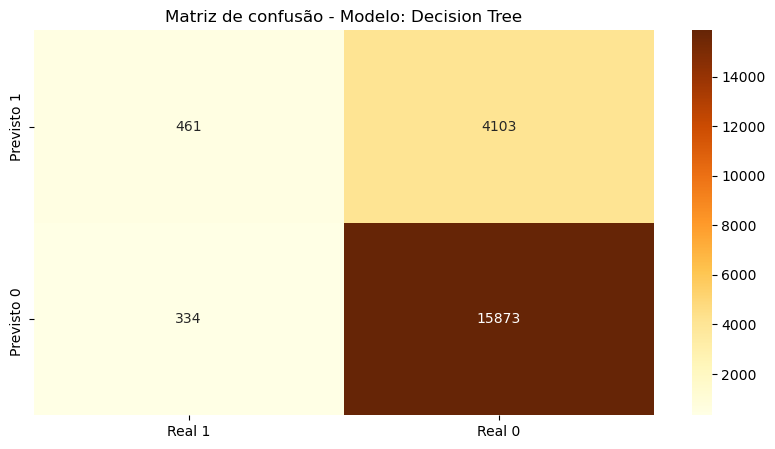

In [40]:
plot_matrix_confusion(modelo_tree, previsoes_arvore, sns.color_palette("YlOrBr", as_cmap=True), y_test)

A partir da matriz, nota-se um comportamento semelhante ao do modelo anterior, trazendo uma acurácia menor quando se trata de previsões do tipo 0 (participação menor que 50%).

In [41]:
print('Relatório de Classificação Árvore de Decisão:')
print(relatorio_classificacao_arvore)

Relatório de Classificação Árvore de Decisão:
              precision    recall  f1-score   support

           0       0.58      0.10      0.17      4564
           1       0.79      0.98      0.88     16207

    accuracy                           0.79     20771
   macro avg       0.69      0.54      0.52     20771
weighted avg       0.75      0.79      0.72     20771



# Gráficos para Avaliação do Desempenho do modelo
Novamente, plotou-se os gráficos relativos às análises feitas para melhor visualização e interpretação dos resultados obtidos pelo modelo.

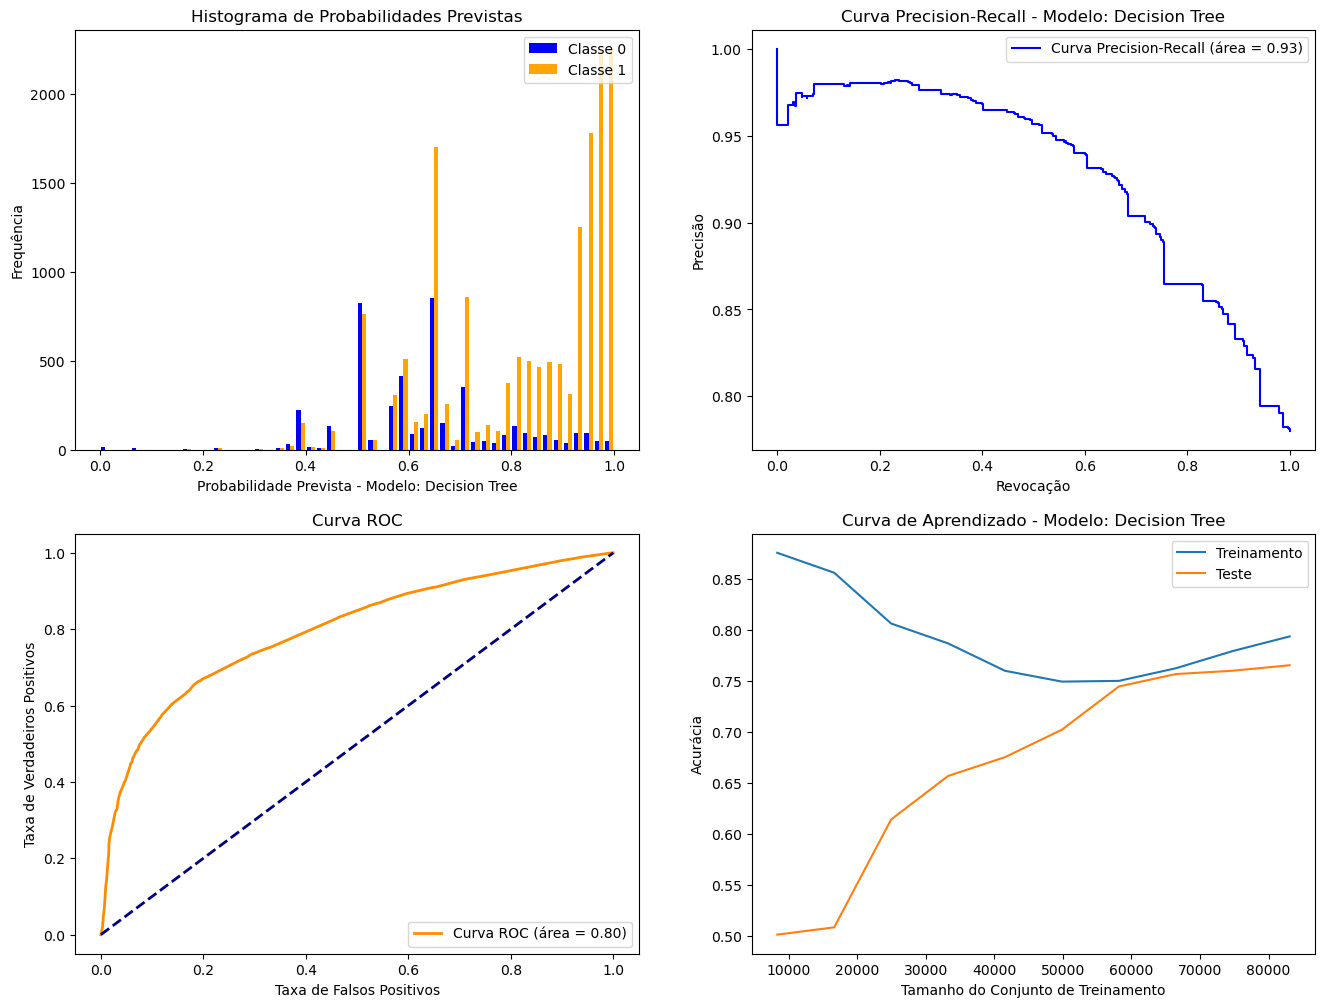

In [42]:
plot_avaliations(modelo_tree, probabilidades_arvore, y_test, modelo_arvore)

A partir dos gráficos, é perceptível a relação diretamente proporcional entre tamanho de conjunto e acurácia do modelo. A curva ROC se mantém semelhante a anterior. Enquanto a curva de aprendizado mostra um intervalo de tamanho de conjunto aonde a acurácia no teste e no treinamento se aproximam.

# Importância das features - Decision Tree Classifier
Nesta etapa, foi extraido do modelo a importância de cada feature em relação as outras no momento de decisão , e plotada em um histograma para melhor visualização.

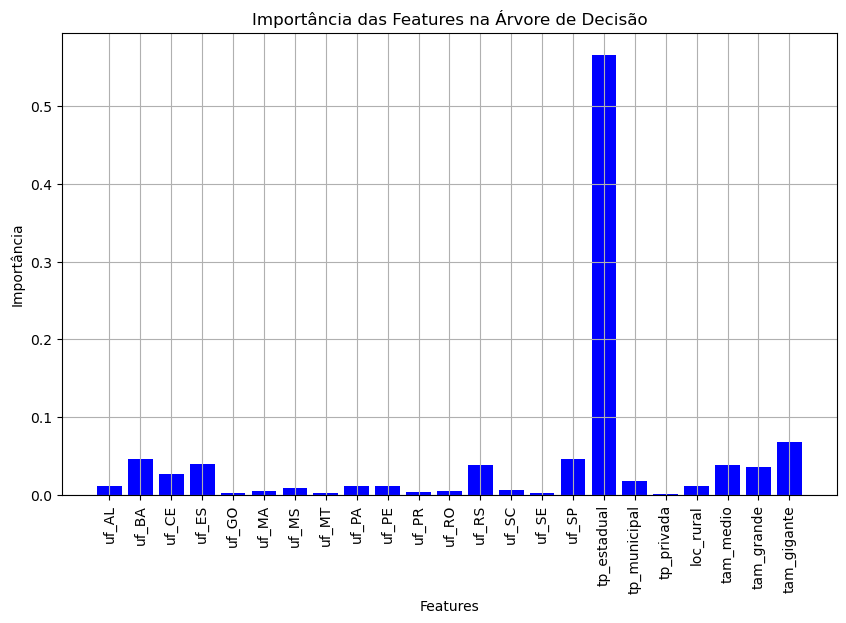

In [43]:
importances = modelo_arvore.feature_importances_
indices = range(len(importances))

plt.figure(figsize=(10, 6))
plt.bar(indices, importances, color='b', align='center')
plt.xticks(indices, X.columns, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importância')
plt.title('Importância das Features na Árvore de Decisão')
plt.grid()
plt.show()

A partir do gráfico, entende-se que existem variáveis que aparentam maior importância na hora da tomada de decisão do modelo, como exemplo o tipo de escola(privada, municipal, estadual).
Essa visualização é útil para identificar que a feature de escola do tipo estadual contribui significativamente mais para as decisões do modelo.

# Construção do terceiro modelo - Gradient Boosting Classifier
No terceiro modelo, utilizou-se do Gradient Boosting Classifier que se baseia , sucintamente, em uma técnica de esemble, que visa criar um modelo de forma iterativa. A cada iteração é adicionado um modelo mais simples que corrige o erro dos anteriores, levando a construção de um modelo robusto e preciso no final.

In [44]:
model_gradient = 'Gradient Boosting'

modelo_gradient_boosting = GradientBoostingClassifier(random_state=42)

# Treinar o modelo nos dados de treinamento
modelo_gradient_boosting.fit(X_train, y_train)

# Fazer previsões nos dados de teste
previsoes_gradient = modelo_gradient_boosting.predict(X_test)

probabilidades_gradient = modelo_gradient_boosting.predict_proba(X_test)[:, 1]

# Desempenho do modelo - Gradient Boosting Classifier
Reiterando a prática, foram gerados gráficos referentes às análises conduzidas, buscando proporcionar uma visualização aprimorada e facilitar a interpretação dos resultados obtidos pelo modelo.

In [45]:
acuracia_gradient = accuracy_score(y_test, previsoes_gradient)
matriz_confusao_gradient = confusion_matrix(y_test, previsoes_gradient)
relatorio_classificacao_gradient = classification_report(y_test, previsoes_gradient)

In [46]:
print(f'Acurácia Gradient Boosting: {acuracia_gradient:.4f}')

Acurácia Gradient Boosting: 0.7861


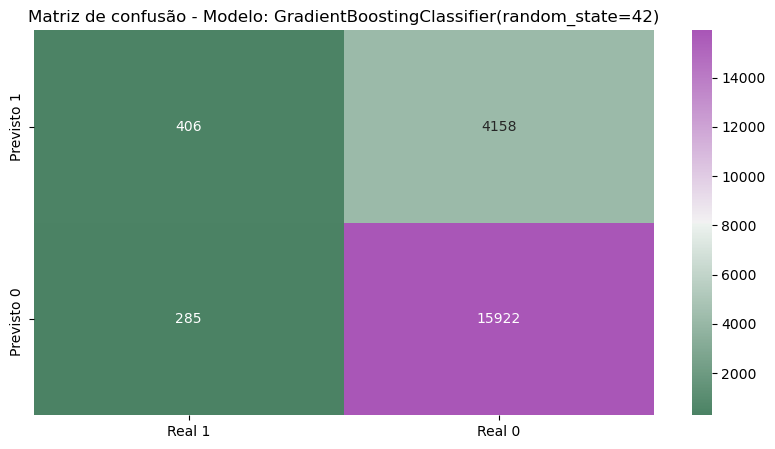

In [47]:
plot_matrix_confusion(modelo_gradient_boosting, previsoes_gradient, sns.diverging_palette(145, 300, s=60, as_cmap=True), y_test)

A partir da matriz confusão e do relatório, nota-se uma selmelhança na precisão com relação aos outros modelo , mesmo se mostrando levemente melhor (0,01)

In [48]:
print('Relatório de Classificação Gradient Boosting:')
print(relatorio_classificacao_gradient)

Relatório de Classificação Gradient Boosting:
              precision    recall  f1-score   support

           0       0.59      0.09      0.15      4564
           1       0.79      0.98      0.88     16207

    accuracy                           0.79     20771
   macro avg       0.69      0.54      0.52     20771
weighted avg       0.75      0.79      0.72     20771



# Gráficos para Avaliação do Desempenho do modelo

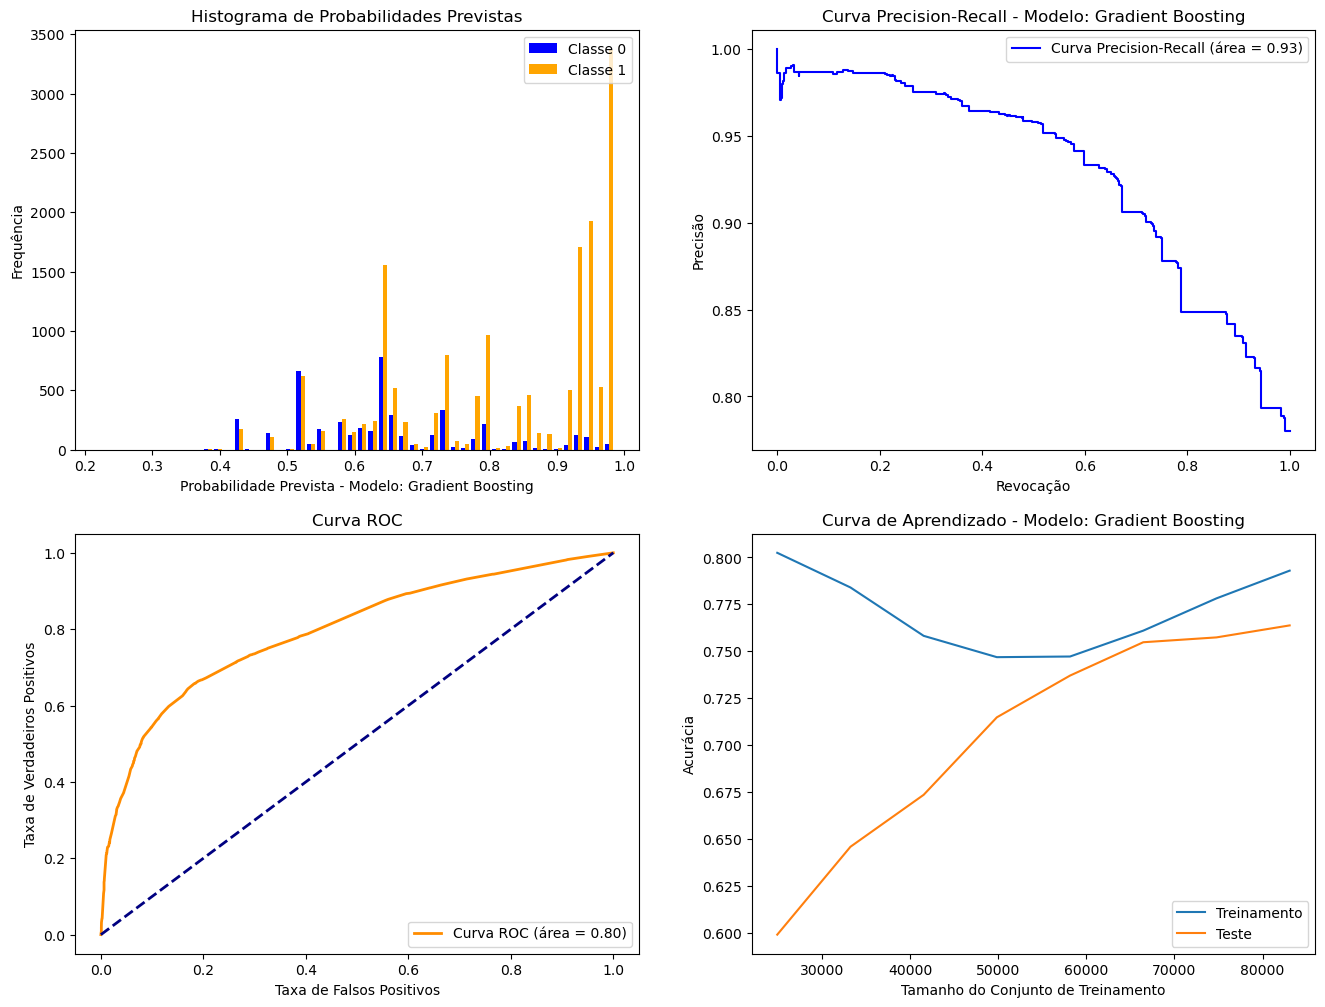

In [49]:
plot_avaliations(model_gradient, probabilidades_gradient, y_test, modelo_gradient_boosting)

A partir dos graficos, nota-se uma curva ROC semelhante as anteriores. A curva de apredizado é oque mais muda dentro os 3 modelos.Nessa contexto, nota-se uma certa proximidade entre as curvas, sendo maior que a da Regressão Logistica, porém ainda é menor que a da Árvore de Decisão.

# Importância das features - Decision Gradient Boosting

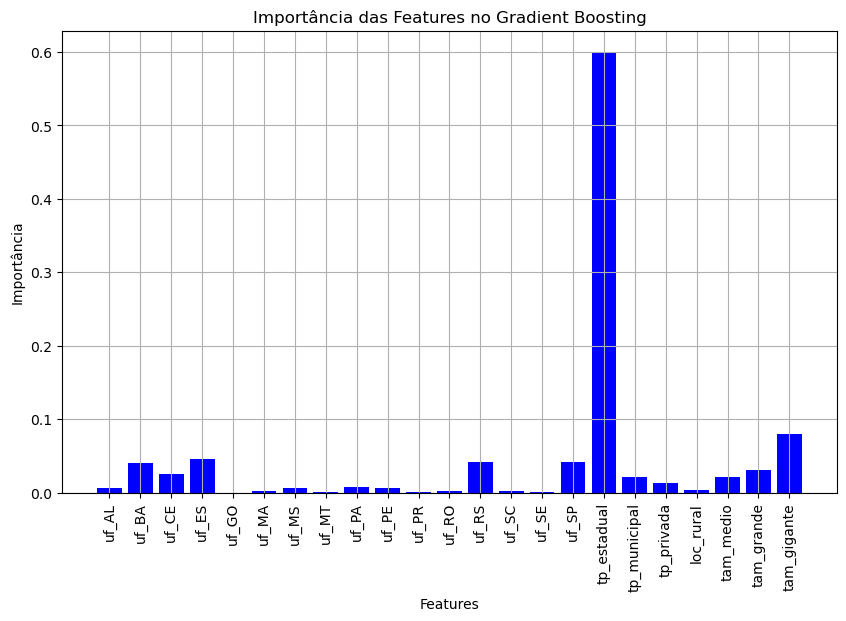

In [50]:
importances = modelo_gradient_boosting.feature_importances_
indices = range(len(importances))

plt.figure(figsize=(10, 6))
plt.bar(indices, importances, color='b', align='center')
plt.xticks(indices, X.columns, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importância')
plt.title('Importância das Features no Gradient Boosting')
plt.grid()
plt.show()

Nota-se uma semelhança da importância de certas variáveis em relação a da árvore de decisão, trazendo muita importância no tipo de escola.

# Construção do quarto modelo - rede neural simples

In [52]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [53]:
rede_neural = Sequential([
#     Camada densa 1 (totalmente conectada) com 128 neurônios, função de ativação ReLU 
#     e input_shape definido como (23,), indicando que cada entrada tem 23 dimensões.
    Dense(128, activation='relu', input_shape=(23,)),
    
#     Camada densa 2
    Dense(128, activation='relu', input_shape=(23,)),
    
#     Camada de dropout que desativa aleatoriamente 20% dos neurônios durante 
#     o treinamento, o que ajuda a prevenir o overfitting.
    Dropout(0.2),
    
#     Camada densa com 10 neurônios
    Dense(1, activation='sigmoid')
])

In [54]:
rede_neural.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               3072      
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 19,713
Trainable params: 19,713
Non-trainable params: 0
_________________________________________________________________


In [55]:
rede_neural.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [56]:
rede_neural.fit(X_train, 
                y_train,
                validation_split=.3,
                epochs=10)

Epoch 1/10
1818/1818 [==============================] - 2s 1ms/step - loss: 0.4351 - accuracy: 0.7877 - val_loss: 0.4279 - val_accuracy: 0.7858
Epoch 2/10
1818/1818 [==============================] - 2s 987us/step - loss: 0.4270 - accuracy: 0.7890 - val_loss: 0.4264 - val_accuracy: 0.7864
Epoch 3/10
1818/1818 [==============================] - 2s 1ms/step - loss: 0.4266 - accuracy: 0.7900 - val_loss: 0.4260 - val_accuracy: 0.7862
Epoch 4/10
1818/1818 [==============================] - 2s 1ms/step - loss: 0.4258 - accuracy: 0.7899 - val_loss: 0.4265 - val_accuracy: 0.7857
Epoch 5/10
1818/1818 [==============================] - 2s 998us/step - loss: 0.4258 - accuracy: 0.7896 - val_loss: 0.4265 - val_accuracy: 0.7859
Epoch 6/10
1818/1818 [==============================] - 2s 1ms/step - loss: 0.4254 - accuracy: 0.7896 - val_loss: 0.4255 - val_accuracy: 0.7875
Epoch 7/10
1818/1818 [==============================] - 2s 1ms/step - loss: 0.4254 - accuracy: 0.7900 - val_loss: 0.4254 - val_accur

In [57]:
rede_neural

# Avaliando o desempenho do modelo - Rede Neural


A partir da acurácia do último modelo (neural), nota-se que a aplicação mais sucinta e imediata já obteve resultado equiparável aos outros. Nesse contexto, tal efetividade reflete-se em algumas características do próprio modelo, como a capacidade de aprender representações hierárquicas dos dados, a flexibilidade do modelo em tratar relações não lineares entre os dados e a capacidade de identificar padrões em quantidades significativas de dados, entre outros. Entretanto, nota-se que os outros modelos possuem sua utilidade e podem superar o modelo neural em determinadas situações. Em suma, conclui-se que é necessário a experimentação de diversos modelos, com o intuito de entender qual é mais efetivo dado determinado target e determinada base de dados.







## Conclusão

Ao analisar as conclusões de cada modelo explorado, revelou-se questões complexas referentes à previsão da taxa de participação no ENEM por escola. Cada abordagem proporcionou uma perspectiva única, contribuindo para uma compreensão mais completa do cenário em questão.

**Regressão Logística:**
Com uma acurácia de 78.4%, a Regressão Logística evidenciou eficácia em prever a taxa de participação, com uma precisão notável ao lidar com previsões acima de 50%. O relatório de classificação destaca a importância de interpretar as métricas em relação ao contexto específico do problema. O histograma de probabilidades e a análise da curva de aprendizado reforçam a capacidade do modelo de ajustar-se conforme o conjunto de treinamento cresce.

**Árvore de Decisão:**
A Árvore de Decisão, com uma acurácia de 78.6%, teve um desempenho semelhante ao da Regressão Logística, especialmente na predição de participações abaixo de 50%. A análise da importância das features reforça o papel crucial do tipo de escola na tomada de decisão do modelo. A curva de aprendizado e a relação proporcional entre o tamanho do conjunto e a acurácia destacam a capacidade do modelo em se adaptar diante de diferentes volumes de dados.

**Gradient Boosting Classifier:**
Ao empregar o Gradient Boosting Classifier, atingimos uma acurácia de 78.6%, assim como no modelo anterior. Este modelo, baseado em técnicas de ensemble, destaca-se pela construção iterativa, corrigindo os erros dos modelos anteriores. Observamos uma proximidade entre as curvas ROC dos modelos anteriores, mas a curva de aprendizado revela nuances distintas, apontando para uma adaptação mais eficaz em conjuntos de treinamento maiores.

**Rede Neural Simples:**
O quarto modelo, uma Rede Neural Simples, surpreende ao alcançar uma acurácia 0.3% maior em relação aos demais modelos (78.9%). Sua capacidade de aprender representações hierárquicas e lidar com relações não lineares destaca a flexibilidade das redes neurais. Contudo, a conclusão ressalta a utilidade dos outros modelos em cenários específicos, evidenciando a importância da experimentação para determinar a efetividade diante de diferentes targets e bases de dados.

<br>
Em síntese, nessa análise exploratória revelou-se que a escolha do modelo não é uma decisão trivial. Cada abordagem possui nuances, vantagens e desafios próprios. A experimentação com diversos modelos serve como uma estratégia essencial para compreender qual se mostra mais efetivo em contextos específicos. A conclusão, portanto, vai além de uma simples resposta à pergunta inicial, o projeto pode proporcionar insights valiosos sobre a complexidade subjacente aos dados educacionais brasileiros.

Este projeto, mais do que responder uma pergunta específica, oferece uma visão holística dos dados do ENEM por escola, evidenciando a necessidade de uma abordagem diversificada na análise de dados educacionais e ressaltando a relevância da escolha criteriosa de modelos para uma compreensão mais precisa e contextualizada do cenário educacional brasileiro.